<a href="https://colab.research.google.com/github/JayMalde/Deep-Learning/blob/master/Exercise_6_CNN_Mnist_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN Mnist_Fashion Dataset**

## **Importing Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

## **Loading Dataset And Splitting it**

In [5]:
# Load the Dataset
fashion_mnist=tf.keras.datasets.fashion_mnist

In [6]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## **Normalizing The Data Or Scalind Data Without Distorting It**

In [7]:
x_train,x_test = x_train/255.0,x_test/255.0

## **Adding A Extra Dimension So That We Can Use and View it in GrayScale**

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

In [10]:
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
k=len(set(y_train))

## **Creating A Model and Executing It**

In [14]:
#Build The Model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='relu')(x)

model = Model(i,x)


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3195 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
1875/1875 [==============================] - 29s 16ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
1875/1875 [==============================] - 27s 15ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
1875/1875 [==============================] - 27s 15ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 27s 15ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 27s 15ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 -

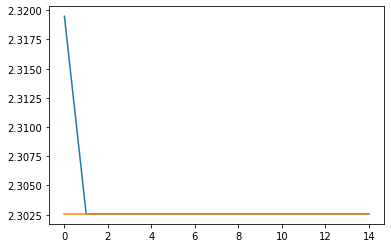

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')